In [10]:
# Cell 1: Import Libraries
from collections import defaultdict

In [11]:
# Cell 2: Parse the Knowledge Base
# Define the graph as a dictionary {city: [(neighbor, is_terminal, utility_value)]}
graph = {
    "Addis": [("Gimbi", False, None), ("Ambo", False, None), ("Nekemet", False, None)],
    "Gimbi": [("Addis", False, None), ("Limu", True, 8)],  # Limu is a terminal node with utility 8
    "Ambo": [("Addis", False, None), ("Wolkite", False, None)],
    "Wolkite": [("Ambo", False, None), ("Buta", False, None)],
    "Buta": [("Wolkite", False, None), ("Jimma", True, 6)],  # Jimma is a terminal node with utility 6
    "Nekemet": [("Addis", False, None), ("Adama", False, None)],
    "Adama": [("Nekemet", False, None), ("Mojo", True, 5)],  # Mojo is a terminal node with utility 5
    "Diredawa": [("Harar", False, None)],
    "Harar": [("Diredawa", False, None), ("Babile", True, 4)],  # Babile is a terminal node with utility 4
    "Chiro": [("Worabe", True, 7)],  # Worabe is a terminal node with utility 7
    "Tepi": [("Kaffa", True, 9)],  # Kaffa is a terminal node with utility 9
}

# Define the initial state
initial_state = "Addis"

In [12]:
# Cell 3: Implement the MiniMax Algorithm
class MiniMax:
    def __init__(self, graph):
        self.graph = graph

    def minimax(self, state, maximizing_player, visited=None):
        """
        Perform MiniMax search to find the best move for the agent.
        :param state: Current state (city)
        :param maximizing_player: True if it's the agent's turn, False if it's the adversary's turn
        :param visited: Set of visited states to prevent infinite recursion
        :return: (best_value, best_move)
        """
        if visited is None:
            visited = set()

        # Mark the current state as visited
        visited.add(state)

        # Get neighbors of the current state
        neighbors = self.graph[state]

        # If the current state is a terminal state, return its utility value
        if all(is_terminal for _, is_terminal, _ in neighbors):
            return max((utility for _, _, utility in neighbors if utility is not None), default=float('-inf')), None

        if maximizing_player:
            # Agent's turn: maximize the utility
            best_value = float('-inf')
            best_move = None
            for neighbor, is_terminal, utility in neighbors:
                if neighbor in visited:
                    continue  # Skip already visited states to prevent cycles
                if is_terminal:
                    value = utility
                else:
                    value, _ = self.minimax(neighbor, False, visited.copy())  # Recurse for the adversary's turn
                if value > best_value:
                    best_value = value
                    best_move = neighbor
            return best_value, best_move
        else:
            # Adversary's turn: minimize the utility
            best_value = float('inf')
            best_move = None
            for neighbor, is_terminal, utility in neighbors:
                if neighbor in visited:
                    continue  # Skip already visited states to prevent cycles
                if is_terminal:
                    value = utility
                else:
                    value, _ = self.minimax(neighbor, True, visited.copy())  # Recurse for the agent's turn
                if value < best_value:
                    best_value = value
                    best_move = neighbor
            return best_value, best_move

In [13]:
# Cell 4: Test the Algorithm
# Initialize the MiniMax class
minimax_search = MiniMax(graph)

# Perform MiniMax search starting from the initial state
# Pass an empty set for visited nodes to prevent infinite recursion
best_value, best_move = minimax_search.minimax(initial_state, True, visited=set())

print("Best Utility Value:", best_value)
print("Best Move from Addis:", best_move)

Best Utility Value: 8
Best Move from Addis: Gimbi


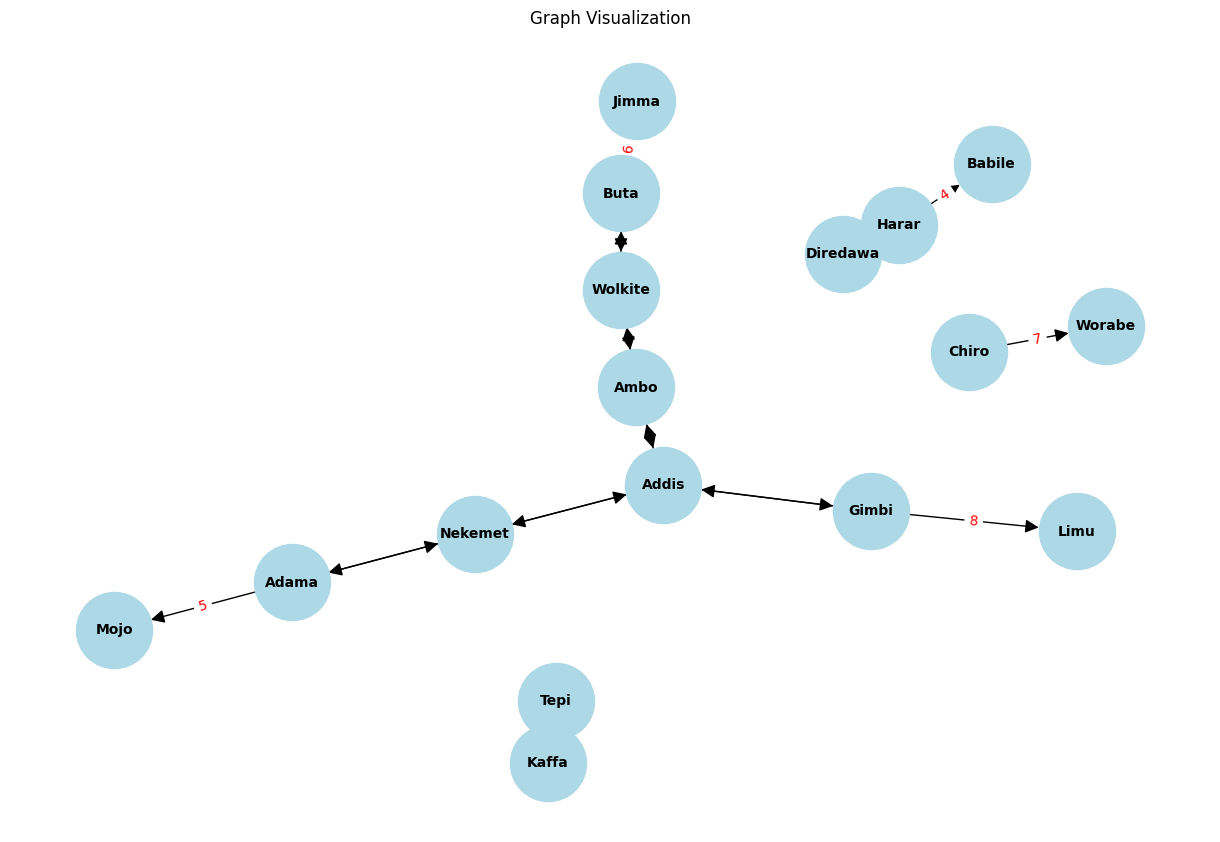

In [14]:
import networkx as nx

import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for city, neighbors in graph.items():
    for neighbor, is_terminal, utility in neighbors:
        label = f"{utility}" if is_terminal else ""
        G.add_edge(city, neighbor, label=label)

# Draw the graph
pos = nx.spring_layout(G)  # Layout for better visualization
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")
plt.title("Graph Visualization")
plt.show()